In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
import random
import faker
fake = faker.Faker()

In [24]:
medicine_names = ["Metformin", "Metoprolol", "Fluticasone", "Ipratropium", "Methotrexate", "Raloxifene", "Atorvastatin", "Carbamazepine", "Azathioprine"]

In [76]:
my_date = date(2023,9,1) + timedelta(days=1)
str(my_date)

'2023-09-02'

In [42]:
int(np.random.normal(10,2,size=1))

9

In [132]:
class Medicine:
    def __init__(self, name, quantity, reorder_point, reorder_quantity, date):
        self.name = name
        self.quantity = quantity
        self.reorder_point = reorder_point
        self.reorder_quantity = reorder_quantity
        self.date = date

    def increase_quantity(self, amount):
        self.quantity += amount
        self.date = self.date + timedelta(days=1)

    def decrease_quantity(self, amount):
        if self.quantity - amount < 0:
            self.quantity = 0
            self.date = self.date + timedelta(days=1)
        else:
            print(amount)
            self.quantity -= amount
            self.date = self.date + timedelta(days=1)

    def is_below_reorder_point(self):
        return self.quantity < self.reorder_point

    def simulate(self):
        if self.is_below_reorder_point():
            # print(self.name, self.quantity, self.reorder_point)
            self.increase_quantity(self.reorder_quantity)
        else:
            # print("Yes")
            self.decrease_quantity(abs(int(np.random.normal(self.reorder_point,self.reorder_point//2,size=1))))
            


In [133]:
medicine = []
for i in range(len(medicine_names)):
    medicine.append(Medicine(medicine_names[i],int(np.random.normal(100,30,size=1)), int(np.random.normal(20,10,size=1)), int(np.random.normal(100,30,size=1)), date(2023,9,1)))

data = []
for i in range(30):
    for j in range(len(medicine)):
        data.append({"Date":str(medicine[j].date), "Medicine": medicine[j].name, "Quantity":medicine[j].quantity})
        medicine[j].simulate()

14
28
53
15
20
14
29
36
28
0
36
10
18
38
19
27
26
10
24
8
11
15
15
27
33
5
22
12
9
13
19
23
7
15
38
2
39
20
17
28
22
14
7
46
19
35
8
26
16
14
21
15
8
32
21
8
14
16
18
22
6
17
10
9
24
23
8
4
4
20
15
21
27
9
21
7
15
17
7
17
33
10
6
20
16
17
23
3
23
30
23
19
25
11
39
11
20
25
12
19
22
13
11
14
17
4
4
27
10
8
16
12
15
9
12
0
37
5
22
11
6
11
10
22
38
15
19
29
20
5
5
18
14
21
41
11
27
15
15
6
23
32
12
2
21
5
13
7
21
47
8
30
16
12
10
3
33
21
6
21
17
21
12
8
13
10
13
17
13
6
16
22
0
13
33
14
12
6
17
5
24
31
11
8
30
24
13
37
17
18
27
5
49
15
19
3
9
13
10
8
24
19
17
13
6
45
8
49
25
0
31
31
25


In [134]:
data[:]

[{'Date': '2023-09-01', 'Medicine': 'Metformin', 'Quantity': 41},
 {'Date': '2023-09-01', 'Medicine': 'Metoprolol', 'Quantity': 90},
 {'Date': '2023-09-01', 'Medicine': 'Fluticasone', 'Quantity': 150},
 {'Date': '2023-09-01', 'Medicine': 'Ipratropium', 'Quantity': 57},
 {'Date': '2023-09-01', 'Medicine': 'Methotrexate', 'Quantity': 140},
 {'Date': '2023-09-01', 'Medicine': 'Raloxifene', 'Quantity': 115},
 {'Date': '2023-09-01', 'Medicine': 'Atorvastatin', 'Quantity': 62},
 {'Date': '2023-09-01', 'Medicine': 'Carbamazepine', 'Quantity': 127},
 {'Date': '2023-09-01', 'Medicine': 'Azathioprine', 'Quantity': 53},
 {'Date': '2023-09-02', 'Medicine': 'Metformin', 'Quantity': 27},
 {'Date': '2023-09-02', 'Medicine': 'Metoprolol', 'Quantity': 62},
 {'Date': '2023-09-02', 'Medicine': 'Fluticasone', 'Quantity': 97},
 {'Date': '2023-09-02', 'Medicine': 'Ipratropium', 'Quantity': 42},
 {'Date': '2023-09-02', 'Medicine': 'Methotrexate', 'Quantity': 120},
 {'Date': '2023-09-02', 'Medicine': 'Raloxif

In [135]:
df = pd.DataFrame(data = data)
pivot_df = df.pivot(index='Medicine', columns='Date', values='Quantity')

In [136]:
pivot_df

Date,2023-09-01,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,...,2023-09-21,2023-09-22,2023-09-23,2023-09-24,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29,2023-09-30
Medicine,,,,,,,,,,,,,,,,,,,,,
Atorvastatin,62,33,6,76,63,46,0,70,54,30,...,68,61,28,0,70,64,34,7,77,32
Azathioprine,53,25,80,47,24,79,44,29,7,62,...,69,22,77,64,42,25,80,31,0,55
Carbamazepine,127,91,65,38,19,114,95,74,56,33,...,77,56,35,27,11,106,82,77,67,59
Fluticasone,150,97,87,79,57,19,93,67,46,29,...,73,71,55,34,0,74,43,6,80,61
Ipratropium,57,42,24,13,117,115,93,77,69,59,...,112,91,79,62,45,12,116,99,96,79
Metformin,41,27,27,17,12,5,92,84,76,70,...,78,66,58,52,42,42,37,24,9,1
Methotrexate,140,120,82,67,55,16,2,126,112,103,...,87,82,72,51,38,24,13,137,128,115
Metoprolol,90,62,26,2,43,28,0,41,9,50,...,0,41,11,52,39,26,2,43,24,0
Raloxifene,115,101,82,67,58,38,31,17,0,120,...,101,88,85,73,67,55,47,29,16,10


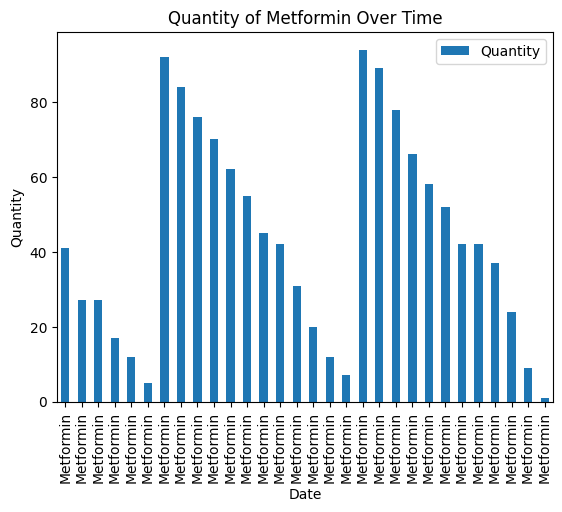

In [137]:
# Set the 'Medicine' column as the index
df.set_index('Medicine', inplace=True)

# Choose the row you want to plot, e.g., 'Metformin'
row_to_plot = df.loc[medicine_names[0]]

# Plot the selected row
ax = row_to_plot.plot(kind='bar')

# Set labels for the x and y-axis
plt.xlabel('Date')
plt.ylabel('Quantity')

# Set the title of the plot
plt.title('Quantity of Metformin Over Time')

# Show the plot
plt.show()